<a href="https://colab.research.google.com/github/LeTranDinhTruc/w9_AI_BT/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


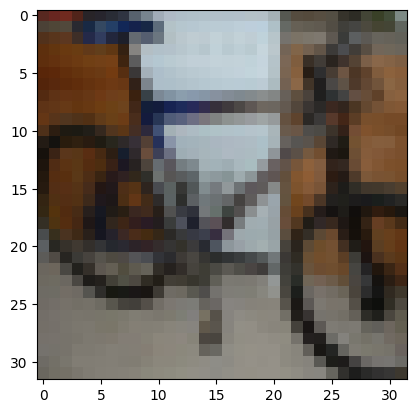

hinh: [8]


In [ ]:
import matplotlib.pyplot as plt
digit=x_train[30]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('hinh:',y_train[30])

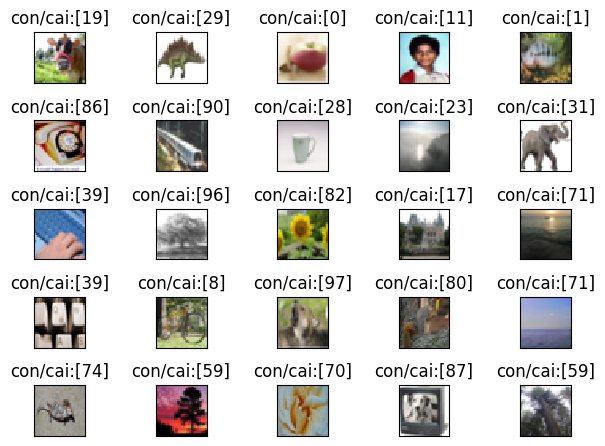

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('con/cai:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#Dense: full connetion
#tao model mang ANN
model=Sequential()
#them lop mang trung gian
model.add(Dense(3000,activation='relu',input_shape=(32*32*3,)))
#them lop mang trung gian
model.add(Dense(1000,activation='relu'))
#them lop mang trung gian
model.add(Dense(500,activation='relu'))
#them lop dau ra
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
Total params: 12,770,600
Trainable params: 12,770,600
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X=x_test
Y=y_test

In [ ]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)
print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mat mat:',test_loss)
print('do chinh xac:',test_acc)

Epoch 1/100
391/391 [==============================] - 103s 260ms/step - loss: 4.3296 - accuracy: 0.0546
Epoch 2/100
391/391 [==============================] - 100s 257ms/step - loss: 3.8126 - accuracy: 0.1140
Epoch 3/100
391/391 [==============================] - 101s 259ms/step - loss: 3.6175 - accuracy: 0.1485
Epoch 4/100
391/391 [==============================] - 102s 260ms/step - loss: 3.4782 - accuracy: 0.1760
Epoch 5/100
391/391 [==============================] - 102s 260ms/step - loss: 3.3664 - accuracy: 0.1924
Epoch 6/100
391/391 [==============================] - 108s 277ms/step - loss: 3.2676 - accuracy: 0.2076
Epoch 7/100
391/391 [==============================] - 102s 261ms/step - loss: 3.1784 - accuracy: 0.2251
Epoch 8/100
391/391 [==============================] - 103s 263ms/step - loss: 3.0915 - accuracy: 0.2423
Epoch 9/100
391/391 [==============================] - 102s 261ms/step - loss: 3.0068 - accuracy: 0.2579
Epoch 10/100
391/391 [==============================] -

In [ ]:
model.save('test_cifar_100.h5')